In [1]:
import keras

Using Theano backend.


In [2]:
import numpy as np
np.random.seed(123)

In [3]:
from keras.models import Sequential

In [4]:
from keras.layers import Dense, Dropout, Activation, Flatten

In [5]:
from keras.layers import Convolution2D, MaxPooling2D

In [6]:
from keras.utils import np_utils

In [7]:
from keras.datasets import mnist

In [74]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [12]:
%matplotlib inline

In [75]:
print(X_train.shape)

(60000, 28, 28)


In [13]:
from matplotlib import pyplot as plt

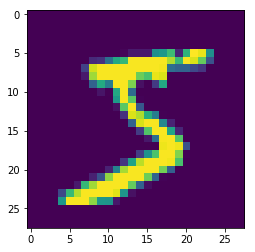

In [14]:
plt.imshow(X_train[0])

### Theano expects a depth 
A full color will have a depth of 3 - here we need to specify that the depth is 1

In [15]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)

In [16]:
X_test = X_test.reshape(X_test.shape[0],1, 28, 28)

In [17]:
print(X_train.shape)

(60000, 1, 28, 28)


### Normalize the data type and the values

In [18]:
X_train = X_train.astype('float32')

In [19]:
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [20]:
print(y_train.shape)

(60000,)


In [21]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


### Convert the training set outputs to categorical instead of a digit

In [24]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


In [23]:
print(Y_train[:10])

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


### No discussion of architecture
Using some sort of established network for this task

In [63]:
model = Sequential()

In [64]:
model.add(Convolution2D(32,3,3,input_shape=(1,28,28),activation='relu'))

/home/vijay/tools/miniconda3/envs/deep-learner/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(1, 28, 28..., activation="relu")`
  if __name__ == '__main__':
/home/vijay/tools/miniconda3/envs/deep-learner/lib/python3.5/site-packages/keras/backend/theano_backend.py:1726: UserWarning: dict_keys(['filter_dilation']) are now deprecated in `tensor.nnet.abstract_conv.conv2d` interface and will be ignored.
  filter_dilation=dilation_rate)


In [66]:
print(model.output_shape)

(None, -1, 26, 32)


In [67]:
model.add(Convolution2D(32,3,3, activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

/home/vijay/tools/miniconda3/envs/deep-learner/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':
/home/vijay/tools/miniconda3/envs/deep-learner/lib/python3.5/site-packages/keras/backend/theano_backend.py:1726: UserWarning: dict_keys(['filter_dilation']) are now deprecated in `tensor.nnet.abstract_conv.conv2d` interface and will be ignored.
  filter_dilation=dilation_rate)


In [41]:
?MaxPooling2D

In [68]:
model.add(Flatten())

In [69]:
model.add(Dense(128,activation='relu'))

ValueError: ('The specified size contains a dimension with value <= 0', (-2304, 128))

In [59]:
model.add(Dropout(0.5))

In [60]:
model.add(Dense(10, activation='softmax'))

### This is where the loss function etc is defined

In [61]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [62]:
model.fit(X_train, Y_train, batch_size = 32, nb_epoch = 10, verbose = 1)

/home/vijay/tools/miniconda3/envs/deep-learner/lib/python3.5/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


ValueError: Error when checking model input: expected conv2d_11_input to have shape (None, 28, 28, 1) but got array with shape (60000, 1, 28, 28)

### Something went wrong with the first tutorial
Trying out a tutorial from the github page of Xavier Snelgrove - https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb

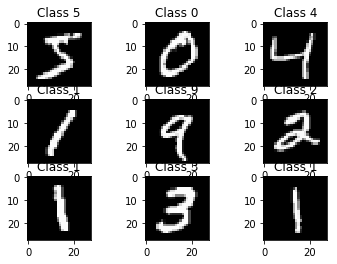

In [77]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

### Format the data for training 
Here, we are changing the input to become a single 784 dimensional vector and scaling the range to be between 0 and 1 instead of [0-255]

In [78]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape ", X_train.shape)
print("Testing matrix shape ", X_test.shape)


Training matrix shape  (60000, 784)
Testing matrix shape  (10000, 784)


### Modify the target variables so that they are one hot matrices
    0 -> [1,0,0,0,0,0,0,0,0,0]

In [79]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)